In [1]:
## Hyperparameters 
# Set the fine-tuning type 
train_type = "shakestrain" # One of ["sonnets", "shakestrain", "poems"]
start_from_self_type = False 
custom_model = False

multimodal = True
save_steps = 10
num_epochs = 200
lr = 5e-7
weight_decay = 0.01
batch_size = 120


# Hyperparams for continue training with checkpoint 
continue_with_checkpoint = False
checkpoint_iter = 2000 # Change this to change which checkpoint to load
num_finished_epochs = 200
num_finished_iter = 2000


In [2]:
## Train

import torch
from transformers import BertTokenizer, BertForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Replace these lists with your actual dataset
# sentences = ["This is an example sentence from my domain.", "Another example sentence from my domain."]
from utils import load_train_eval_data
from utils import CustomDataCollator

# Among the original training data, 75% is used for training, 25% is used for validation
train_prop = 0.75




train_set, val_set = load_train_eval_data(train_type, multimodal, train_prop)


if train_type == "poems":
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    if start_from_self_type: 
        model = BertForMaskedLM.from_pretrained(f"./final_model_poems/")
    else: 
        model = BertForMaskedLM.from_pretrained("bert-base-uncased")
elif train_type == "sonnets":
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    if start_from_self_type: 
        model = BertForMaskedLM.from_pretrained(f"./final_model_sonnets/")
    else: 
        model = BertForMaskedLM.from_pretrained(f"./final_model_poems/")
elif train_type == "shakestrain":
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    if start_from_self_type: 
        model = BertForMaskedLM.from_pretrained(f"./final_model_shakestrain/")
    else: 
        model = BertForMaskedLM.from_pretrained(f"./final_model_sonnets/")

if custom_model == True: 
    model = BertForMaskedLM.from_pretrained("./final_model_shakestrainMM")
        
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForMaskedLM.from_pretrained("./final_model_shakestrain/")
    
# Set up the data collator
if multimodal:
    data_collator = CustomDataCollator(
        tokenizer=tokenizer, mlm_probability=0.15
    )
else:
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=True, mlm_probability=0.15
    )

print(f"Training data type: {train_type}")

# Set up the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    logging_dir="./logs",
    logging_steps=1,
    save_steps=save_steps,
    seed=42,
    learning_rate=lr,
    weight_decay=weight_decay,
)

# Create the Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_set,
    eval_dataset=val_set,
    data_collator=data_collator,
)
    
    
# Fine-tune the model
if continue_with_checkpoint:
    trainer.train(f"./results/checkpoint-{checkpoint_iter}/")
else:
    trainer.train()

torch.save(model, "model.pth")

Found cached dataset text (C:/Users/Shaobo Liang/.cache/huggingface/datasets/text/default-ac7ffdcd748a6687/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Shaobo Liang\.cache\huggingface\datasets\text\default-ac7ffdcd748a6687\0.0.0\cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2\cache-0ca5690d6dd20219.arrow
Loading cached processed dataset at C:\Users\Shaobo Liang\.cache\huggingface\datasets\text\default-ac7ffdcd748a6687\0.0.0\cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2\cache-7c14417a88bbebb4.arrow


Training data type: shakestrain


F:\Programs\anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


KeyboardInterrupt: 

In [3]:
## Save the latest model

output_dir = "./saved_model"
model.save_pretrained(output_dir)

In [3]:
## Print test results for the current saved model (last iteration)

from test import test_main

model_path = "./saved_model/"

k = 5 # I want top 5 test metrics

results_dict = test_main(model_path, k)

print(f"Top {k} accuracy is {results_dict['accuracy']}.")
print(f"Top {k} cosine similarity score is {results_dict['cos_sim']}.")
# print(f"Top {k} rhyming score is {results_dict["rhyme"]}.") # To be implemented




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(["i think good thoughts , whilst others write good _ and like unlettered clerk still cry  ' amen", 'nor taste , nor smell , desire to be _ to any sensual feast with thee alone', 'but my five wits nor my five senses _ dissuade one foolish heart from serving thee', "i have seen roses damask 'd , red and _ but no such roses see i in her cheeks", 'i love to hear her speak , yet well i _ that music hath a far more pleasing sound', 'that music hath a far more pleasing _ i grant i never saw a goddess go', "but if thou catch thy hope , turn back to _ and play the mother 's part ,  kiss me ,  be kind", "' i hate ' she alter 'd with an _ that followed it as gentle day", "thy beauty 's form in table of my _ my body is the frame wherein  'tis held", 'to say , within thine own deep sunken _ were an all-eating shame ,  and thriftless praise', 'so long as men can breathe , or eyes can _ so long lives this ,  and this gives life to thee', "and each doth good turns now unto the _ when that mine eye is

In [5]:
## Save all checkpoitn test results for current iteration. 

import json
import math


## Hyperparams
total_iters_per_eph = int(math.ceil(len(train_set) / batch_size))
prev_log_name = "acc_cos_log" #  This is for continuing with checkpoint 
num_saved_models = int(total_iters_per_eph * num_epochs / save_steps)
num_start_iter = int((num_finished_iter + save_steps) / save_steps)  # The starting iteration of this training round here 


# Obtain list of test results for every checkpoint 
acc_arr = []
cos_arr = []

if continue_with_checkpoint:
    with open(f"./results/{prev_log_name}.json", "r") as openfile:
        json_object = json.load(openfile)
    acc_arr = json_object["acc_arr"]
    cos_arr = json_object["cos_arr"]
    
    for i in range(num_saved_models - num_start_iter):
        model_path = f"./results/checkpoint-{save_steps * (i + 1 + num_start_iter)}/"

        k = 5 # I want top 5 test metrics

        results_dict = test_main(model_path, k)

        print(f"Checkpoint {save_steps * (i+1+num_start_iter)}")
        print(f"Top {k} accuracy is {results_dict['accuracy']}.")
        print(f"Top {k} cosine similarity score is {results_dict['cos_sim']}.")

        acc_arr.append(results_dict['accuracy'])
        cos_arr.append(results_dict['cos_sim'])    
else:
    for i in range(num_saved_models):
        model_path = f"./results/checkpoint-{save_steps * (i + 1)}/"

        k = 5 # I want top 5 test metrics

        results_dict = test_main(model_path, k)

        print(f"Checkpoint {save_steps * (i+1)}")
        print(f"Top {k} accuracy is {results_dict['accuracy']}.")
        print(f"Top {k} cosine similarity score is {results_dict['cos_sim']}.")

        acc_arr.append(results_dict['accuracy'])
        cos_arr.append(results_dict['cos_sim'])
    

Checkpoint 10
Top 5 accuracy is 0.12332439678284182.
Top 5 cosine similarity score is 0.412333220243454.
Checkpoint 20
Top 5 accuracy is 0.13941018766756033.
Top 5 cosine similarity score is 0.42533281445503235.
Checkpoint 30
Top 5 accuracy is 0.15013404825737264.
Top 5 cosine similarity score is 0.4313279986381531.
Checkpoint 40
Top 5 accuracy is 0.1581769436997319.
Top 5 cosine similarity score is 0.43872401118278503.
Checkpoint 50
Top 5 accuracy is 0.1581769436997319.
Top 5 cosine similarity score is 0.443032443523407.
Checkpoint 60
Top 5 accuracy is 0.1554959785522788.
Top 5 cosine similarity score is 0.4416302740573883.
Checkpoint 70
Top 5 accuracy is 0.15281501340482573.
Top 5 cosine similarity score is 0.4415646493434906.
Checkpoint 80
Top 5 accuracy is 0.15281501340482573.
Top 5 cosine similarity score is 0.4437216520309448.
Checkpoint 90
Top 5 accuracy is 0.15013404825737264.
Top 5 cosine similarity score is 0.4422157406806946.
Checkpoint 100
Top 5 accuracy is 0.14745308310991

Checkpoint 780
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.44346070289611816.
Checkpoint 790
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.44423502683639526.
Checkpoint 800
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.444145143032074.
Checkpoint 810
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.4439249038696289.
Checkpoint 820
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.44426390528678894.
Checkpoint 830
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.4437841773033142.
Checkpoint 840
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.44382572174072266.
Checkpoint 850
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.44419267773628235.
Checkpoint 860
Top 5 accuracy is 0.13672922252010725.
Top 5 cosine similarity score is 0.4442896246910095.
Checkpoint 870
Top 5 accuracy is 

Checkpoint 1540
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.4366522431373596.
Checkpoint 1550
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.43681079149246216.
Checkpoint 1560
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.4367654621601105.
Checkpoint 1570
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.436702698469162.
Checkpoint 1580
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.43679818511009216.
Checkpoint 1590
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.4369063675403595.
Checkpoint 1600
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.43716999888420105.
Checkpoint 1610
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.4370432496070862.
Checkpoint 1620
Top 5 accuracy is 0.11796246648793565.
Top 5 cosine similarity score is 0.4369719624519348.
Checkpoint 1630
Top 5 accu

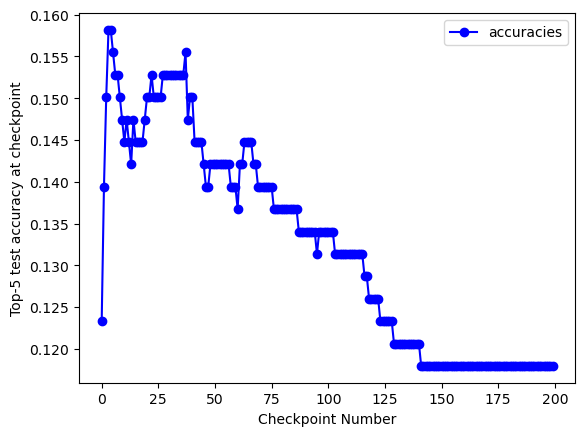

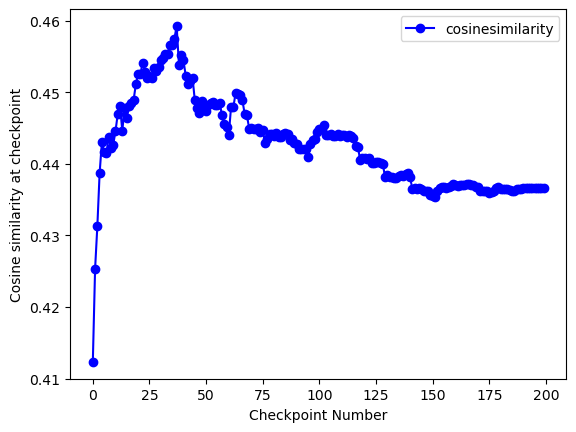

In [6]:
## Plot all test results using json log

import matplotlib
import matplotlib.pyplot as plt

plt.plot(acc_arr, '-o', label = 'accuracies', color = 'blue')
plt.xlabel('Checkpoint Number')
plt.ylabel('Top-5 test accuracy at checkpoint')
plt.legend()
plt.show()

plt.plot(cos_arr, '-o', label = 'cosinesimilarity', color = 'blue')
plt.xlabel('Checkpoint Number')
plt.ylabel('Cosine similarity at checkpoint')
plt.legend()
plt.show()

In [7]:
## Save log to text file

array_log = open("acc_cos_log.txt", "w")

array_log.write(str(acc_arr))
array_log.write(str("\n\n"))
array_log.write(str(cos_arr))

array_log.close()

In [8]:
## Save log to json file

import json

cos_arr_list = []

# if continue_with_checkpoint:
for i in range(len(cos_arr)):
    if type(cos_arr[i]) == float:
        cos_arr_list.append(cos_arr[i])
    else:
        cos_arr_list.append(cos_arr[i].item())
# else: 
#     for i in range(len(cos_arr)):
#         cos_arr_list.append(cos_arr[i].item())
    
arrays_dict = {
    "acc_arr": acc_arr,
    "cos_arr": cos_arr_list
}

json_object = json.dumps(arrays_dict)

with open("acc_cos_log.json", "w") as outfile:
    outfile.write(json_object)

In [9]:
## Print the iteration with the highest accuracy and cosine similarity

max_acc = 0
num_max_acc_iter = 0
max_cos = 0
num_max_cos_iter = 0

for i in range(len(acc_arr)):
    if acc_arr[i] > max_acc:
        max_acc = acc_arr[i]
        num_max_acc_iter = save_steps * (i + 1)
    if cos_arr[i] > max_cos:
        max_cos = cos_arr[i]
        num_max_cos_iter = save_steps * (i + 1)

if acc_arr[int(num_max_acc_iter/save_steps)-1] == acc_arr[int(num_max_cos_iter/save_steps)-1]:
    num_max_acc_iter = num_max_cos_iter
        
print(f"Max Acc: {max_acc}")
print(f"Max Acc Iter: {num_max_acc_iter}")
print()
print(f"Max Cos: {max_cos}")
print(f"Max Cos Iter: {num_max_cos_iter}")

Max Acc: 0.1581769436997319
Max Acc Iter: 40

Max Cos: 0.45928502082824707
Max Cos Iter: 380
